<a href="https://colab.research.google.com/github/Manucallej/ADSS/blob/main/Manuela_Calle_NLP_Session_6_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification Practice Notebook

In this notebook you will apply what you have learned in the last sessions to develop a sentiment classifier.

The main objectives of this practice are:

1. **Data Collection and Preparation**: Use a suitable dataset for sentiment analysis.
2. **Text Processing**: Employ spaCy for text cleaning and preparation.
3. **Feature Extraction**: Apply TF-IDF and BoW to transform texts into a model-friendly format.
4. **Modeling**: Implement and train a Logistic Regression classifier using scikit-learn.
5. **Evaluation**: Assess and compare the performance of the classifiers.

We'll begin with data selection and preprocessing. I'll choose a popular and educationally suitable dataset for sentiment analysis. One commonly used dataset for this purpose is the IMDb movie reviews dataset, which is often used in sentiment analysis tasks and is known for being clean and manageable in size.

To do that we need to install first the `tensorflow-datasets` module if we don't have it yet.

In [29]:
!pip install tensorflow-datasets

I will give you the code to prepare the dataset. Since it is a very large dataset (50K reviews in train and 50K reviews in test), we will use only a subset of 5K randomly taken from the train dataset.

This step can take more time the first time you execute it since we have to download all the data.

In [30]:
%%time
import tensorflow_datasets as tfds
import pandas as pd

full_dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
imdb_dataset = full_dataset['train']
imdb_dataset = tfds.as_dataframe(imdb_dataset, info).sample(n=5000, random_state=2024)
print(imdb_dataset.head())

       label                                               text
20556      0  b"What a bad movie. I'm really surprised that ...
23551      1  b"one of the funnest mario's i've ever played....
17408      0  b'"Whipped" is one of the most awful films of ...
11940      0  b"Way to go ace! You just made a chilling, gro...
9385       0  b'I just saw "If\xc2\x85" I can remember the a...
CPU times: user 11.7 s, sys: 1.24 s, total: 13 s
Wall time: 16.1 s


Next, we need to divide the selected reviews into the train and test datasets. The recommendation is to use sklearn and the train_test_split funciton. You should use the seed `2024`

In [31]:
# code here
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    imdb_dataset,
    test_size=0.2,
    random_state=2024,
    stratify=imdb_dataset["label"]
)

train_df.head()

,label,text
10902,1,"b""Big splashy film of the Broadway music. Nath..."
9190,1,b'Darius Goes West is an amazing documentary a...
633,0,"b""This game was made by Sega. Being made by Se..."
24861,1,b'As a horse lover one can only appreciate thi...
198,0,"b""I mean really, how could Charles Band the he..."


Once we have the two datasets we should start with the preprocessing of the data. I will give you one function that you should apply in the `preprocess_text` function in order to decode the original text we took from tensorflow. The rest of the preprocessing will be part of the practice.

In [32]:
%%time
import spacy

# Load the English model for spaCy
nlp = spacy.load('en_core_web_sm')

# We create this function to decodify the text taken from tensorflow
def clean_and_decode_text(text):
    if isinstance(text, bytes):
        text = text.decode('utf-8')
    return text

def preprocess_text(text):
    text = clean_and_decode_text(text)

    doc = nlp(text)
    tokens = [
      token.lemma_.lower()
      for token in doc
      if not token.is_punct
      and not token.is_stop
    ]

    return " ".join(tokens)



# Apply the preprocessing to each review
train_df["clean_text"] = train_df["text"].apply(preprocess_text)
test_df["clean_text"] = test_df["text"].apply(preprocess_text)


CPU times: user 3min 5s, sys: 148 ms, total: 3min 5s
Wall time: 3min 14s


Once the data is prepared, we should extract the features using the TF-IDF approach, and apply the model.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Step 2: Feature Extraction
# Using TF-IDF to convert the processed texts into numerical features
X_train_text = train_df["clean_text"]
X_test_text = test_df["clean_text"]

y_train = train_df["label"]
y_test = test_df["label"]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)


In [40]:
from sklearn.linear_model import LogisticRegression
# Step 3: Model Building
log_reg_tfidf = LogisticRegression()

log_reg_tfidf.fit(X_train_tfidf, train_df["label"])


LogisticRegression()

In the next step, we should evaluate the model on the train data (or validation data if used), make any decission to improve the model, and finally evaluate the model on the test data.

In [41]:
# Step 4: Model Evaluation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

TF-IDF + Logistic Regression
Classification report (test set):
              precision    recall  f1-score   support

    negative       0.87      0.80      0.83       501
    positive       0.81      0.88      0.84       499

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



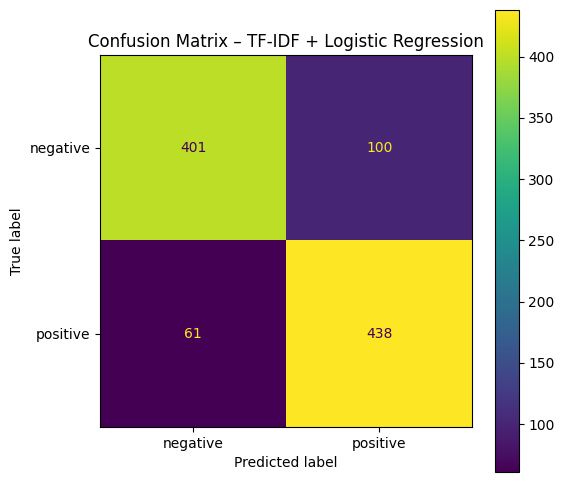

In [42]:
# Example of confussion matrix in the test set using the predictions of a decent model
y_train_pred_tfidf = log_reg_tfidf.predict(X_train_tfidf)
y_test_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)

print("TF-IDF + Logistic Regression")

print("Classification report (test set):")
print(metrics.classification_report(y_test, y_test_pred_tfidf, target_names=["negative", "positive"]))

fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred_tfidf,
    display_labels=["negative", "positive"],
    ax=ax
)
plt.title("Confusion Matrix – TF-IDF + Logistic Regression")
plt.show()



In [37]:
# example of metrics of a decent model in the test set

Now repeat the process, but using BoW instead of TF-IDF and evaluate the results (you can re-use code). Are there any differences? Why?

BoW + Logistic Regression
Classification report (test set):
              precision    recall  f1-score   support

    negative       0.84      0.80      0.82       501
    positive       0.81      0.85      0.83       499

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



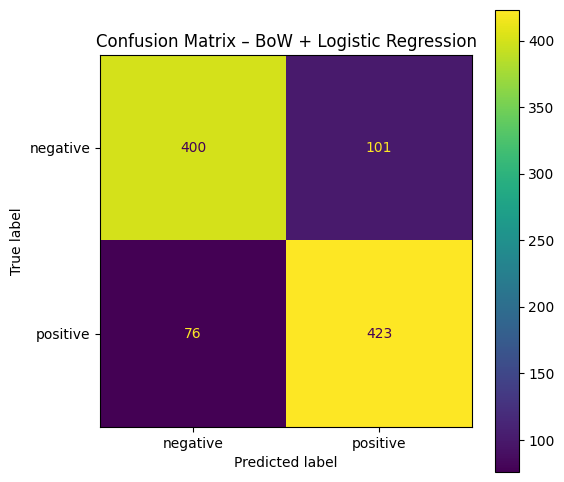

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_features=5000)

X_train_bow = bow_vectorizer.fit_transform(train_df["clean_text"])
X_test_bow = bow_vectorizer.transform(test_df["clean_text"])

log_reg_bow = LogisticRegression(
    random_state=2024,
    max_iter=1000
)
log_reg_bow.fit(X_train_bow, y_train)

y_test_pred_bow = log_reg_bow.predict(X_test_bow)

print("BoW + Logistic Regression")

print("Classification report (test set):")
print(metrics.classification_report(y_test, y_test_pred_bow, target_names=["negative", "positive"]))

fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred_bow,
    display_labels=["negative", "positive"],
    ax=ax
)
plt.title("Confusion Matrix – BoW + Logistic Regression")
plt.show()
